In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download the data from Ohio's COVID-19 website
df = pd.read_csv('https://coronavirus.ohio.gov/static/COVIDSummaryData.csv',low_memory=False)

In [3]:
# Remove the last row of totals
df = df.drop(df.index[df.shape[0]-1])

In [4]:
# Setup data types and make the data more usable
df["Case Count"]                         = pd.to_numeric(df["Case Count"])
df["Hospitalized Count"]                 = pd.to_numeric(df["Hospitalized Count"])
df["Death Due to Illness Count"]         = pd.to_numeric(df["Death Due to Illness Count"])
df["Onset Date"]                         = pd.to_datetime(df["Onset Date"])
df["Date Of Death"]                      = pd.to_datetime(df["Date Of Death"], errors='coerce')
df["Admission Date"]                     = pd.to_datetime(df["Admission Date"], errors='coerce')

df["County"]                             = df["County"].astype('category')
df["Sex"]                                = df["Sex"].astype('category')
df["Age Range"]                          = df["Age Range"].astype('category')

df["Date Of Death"]                      = df["Date Of Death"].fillna("2020-03-01")

In [5]:
df

County     Sex Age Range Onset Date        Date Of Death  \
0        Adams  Female      0-19 2020-04-28           2020-03-01   
1        Adams  Female      0-19 2020-06-10           2020-03-01   
2        Adams  Female      0-19 2020-06-19           2020-03-01   
3        Adams  Female      0-19 2020-06-30           2020-03-01   
4        Adams  Female      0-19 2020-07-18           2020-03-01   
...        ...     ...       ...        ...                  ...   
98991  Wyandot    Male       80+ 2020-05-25  2020-06-12 00:00:00   
98992  Wyandot    Male       80+ 2020-07-22           2020-03-01   
98993  Wyandot    Male       80+ 2020-07-23  2020-08-11 00:00:00   
98994  Wyandot    Male       80+ 2020-08-11           2020-03-01   
98995  Wyandot    Male       80+ 2020-10-26           2020-03-01   

      Admission Date  Case Count  Death Due to Illness Count  \
0                NaT           1                           0   
1                NaT           1                           0   
2                NaT           1                           0   
3                NaT           1                           0   
4                NaT           1                           0   
...              ...         ...                         ...   
98991     2020-06-02           1                           1   
98992            NaT           2                           0   
98993            NaT           1                           1   
98994            NaT           2                           0   
98995            NaT           1                           0   

       Hospitalized Count  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
98991                   1  
98992                   0  
98993                   0  
98994                   0  
98995                   0  

[98996 rows x 9 columns]

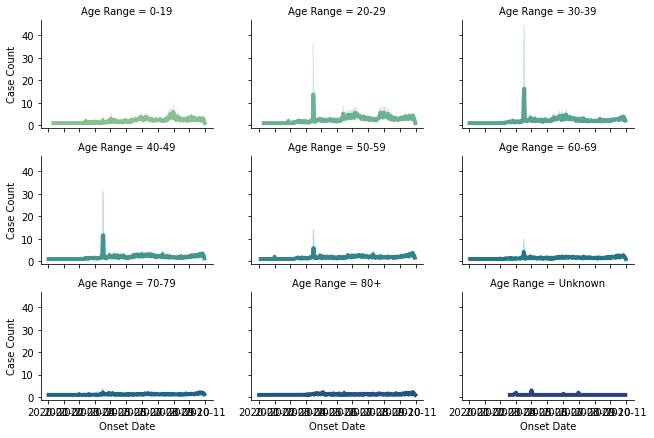

In [6]:
g = sns.relplot(
    data=df[["Age Range","Onset Date","Case Count"]],
    x="Onset Date", y="Case Count", col="Age Range", hue="Age Range",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

In [7]:
df["Onset Month"] = pd.DatetimeIndex(df["Onset Date"]).month

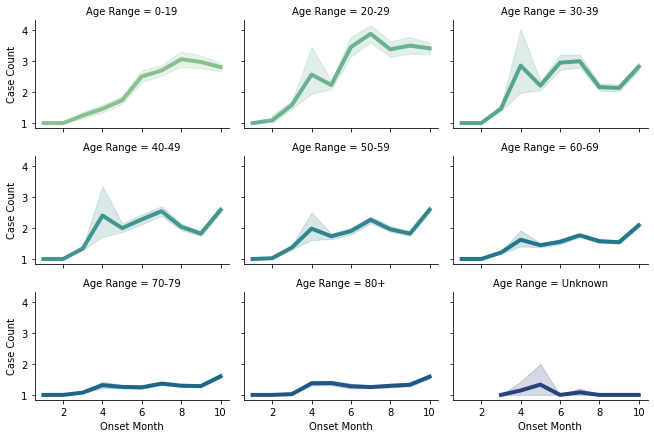

In [8]:
g = sns.relplot(
    data=df[["Age Range","Onset Month","Case Count"]],
    x="Onset Month", y="Case Count", col="Age Range", hue="Age Range",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

In [9]:
df[["Age Range","Onset Date","Case Count"]][(df["Onset Date"]> '2020-10-01')]

Age Range Onset Date  Case Count
16         0-19 2020-10-08           1
17         0-19 2020-10-08           1
18         0-19 2020-10-09           1
19         0-19 2020-10-19           1
20         0-19 2020-10-20           1
...         ...        ...         ...
98985     70-79 2020-10-05           1
98986     70-79 2020-10-12           1
98987     70-79 2020-10-22           1
98988     70-79 2020-10-23           1
98995       80+ 2020-10-26           1

[21587 rows x 3 columns]

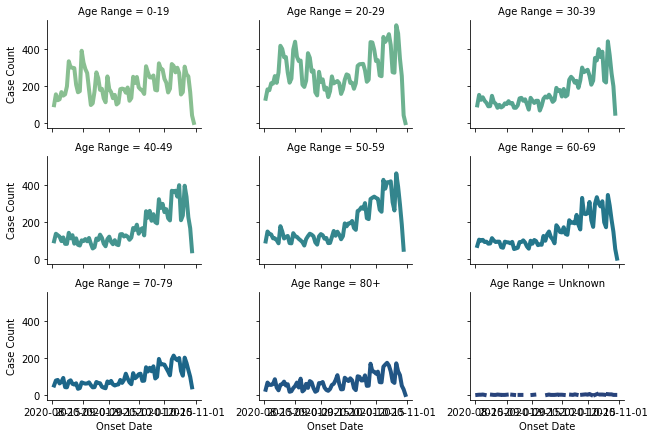

In [10]:
g = sns.relplot(
    data=df[["Age Range","Onset Date","Case Count"]][(df["Onset Date"]> '2020-08-15')].groupby(["Age Range","Onset Date"]).sum(),
    x="Onset Date", y="Case Count", col="Age Range", hue="Age Range",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

In [27]:
recentDate = '2020-10-01'
caseCountRecent = df[["Age Range","Onset Date","Case Count"]][(df["Onset Date"]> recentDate)].groupby(["Age Range"]).sum()
caseCountRecent

Case Count
Age Range            
0-19             6793
20-29            9608
30-39            7570
40-49            7382
50-59            8577
60-69            6569
70-79            4131
80+              2935
Unknown            61

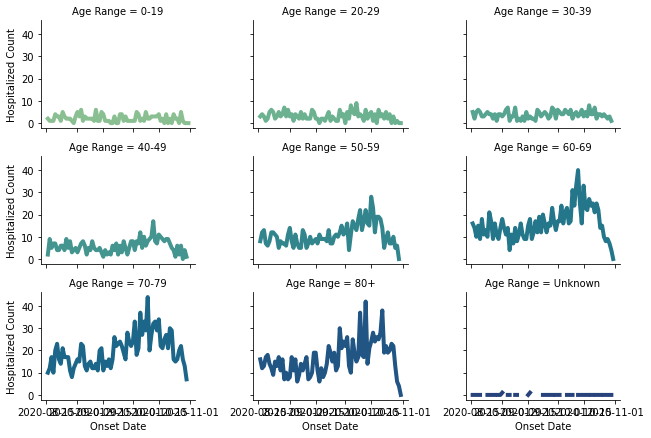

In [12]:
g = sns.relplot(
    data=df[["Age Range","Onset Date","Hospitalized Count"]][(df["Onset Date"]> '2020-08-15')].groupby(["Age Range","Onset Date"]).sum(),
    x="Onset Date", y="Hospitalized Count", col="Age Range", hue="Age Range",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

In [29]:
hospCountRecent = df[["Age Range","Onset Date","Hospitalized Count"]][(df["Onset Date"]> recentDate)].groupby(["Age Range"]).sum()
hospCountRecent

Hospitalized Count
Age Range                    
0-19                       62
20-29                      96
30-39                     118
40-49                     203
50-59                     393
60-69                     592
70-79                     717
80+                       615
Unknown                     0

In [32]:
deathCountRecent = df[["Age Range","Onset Date","Death Due to Illness Count"]][(df["Onset Date"]> recentDate)].groupby(["Age Range"]).sum()
deathCountRecent

Death Due to Illness Count
Age Range                            
0-19                                0
20-29                               0
30-39                               2
40-49                               3
50-59                               6
60-69                              11
70-79                              49
80+                                74
Unknown                             0

In [25]:
hospCountRecent["Hospitalized Count"]/caseCountRecent["Case Count"]*100

Age Range
0-19        0.912704
20-29       0.999167
30-39       1.558785
40-49       2.749932
50-59       4.582022
60-69       9.012026
70-79      17.356572
80+        20.954003
Unknown     0.000000
dtype: float64

In [33]:
deathCountRecent["Death Due to Illness Count"]/hospCountRecent["Hospitalized Count"]*100

Age Range
0-19        0.000000
20-29       0.000000
30-39       1.694915
40-49       1.477833
50-59       1.526718
60-69       1.858108
70-79       6.834031
80+        12.032520
Unknown          NaN
dtype: float64

In [39]:
(deathCountRecent["Death Due to Illness Count"]/caseCountRecent["Case Count"])*100

Age Range
0-19       0.000000
20-29      0.000000
30-39      0.026420
40-49      0.040639
50-59      0.069955
60-69      0.167453
70-79      1.186153
80+        2.521295
Unknown    0.000000
dtype: float64

In [15]:
summary = df[["Age Range","Onset Date","Case Count","Hospitalized Count","Death Due to Illness Count"]]

In [16]:
onsetSortedSummary = summary.sort_values("Onset Date")

In [17]:
groupedOnsetSortedSummary = onsetSortedSummary.groupby(["Age Range","Onset Date"]).sum().fillna(0)
#TODO Clean up 7 day rolling and implement for both Case and Hospitalized
groupedOnsetSortedSummary["Case 7 Day"] = onsetSortedSummary["Case Count"].rolling(2).mean()
groupedOnsetSortedSummary

Case Count  Hospitalized Count  \
Age Range Onset Date                                   
0-19      2020-01-02         0.0                 0.0   
          2020-01-03         0.0                 0.0   
          2020-01-04         0.0                 0.0   
          2020-01-05         0.0                 0.0   
          2020-01-06         0.0                 0.0   
...                          ...                 ...   
Unknown   2020-10-27         4.0                 0.0   
          2020-10-28         4.0                 0.0   
          2020-10-29         1.0                 0.0   
          2020-10-30         1.0                 0.0   
          2020-10-31         0.0                 0.0   

                      Death Due to Illness Count  Case 7 Day  
Age Range Onset Date                                          
0-19      2020-01-02                         0.0         NaN  
          2020-01-03                         0.0         NaN  
          2020-01-04                         0.0         NaN  
          2020-01-05                         0.0         NaN  
          2020-01-06                         0.0         NaN  
...                                          ...         ...  
Unknown   2020-10-27                         0.0         NaN  
          2020-10-28                         0.0         NaN  
          2020-10-29                         0.0         NaN  
          2020-10-30                         0.0         NaN  
          2020-10-31                         0.0         NaN  

[2691 rows x 4 columns]

In [18]:
def replotbyAge(dataFrame,xValue,yValue,age):
    g = sns.relplot(
        data=dataFrame,
        x=xValue, y=yValue, col=age, hue=age,
        kind="line", palette="crest", linewidth=4, zorder=5,
        col_wrap=3, height=5, aspect=1.5, legend=False
    )

    # Iterate over each subplot to customize further
    for ageGroup, ax in g.axes_dict.items():

        # Add the title as an annotation within the plot
        ax.text(.8, .85, ageGroup, transform=ax.transAxes, fontweight="bold")

        # Plot every year's time series in the background
        sns.lineplot(
            data=dataFrame, x=xValue, y=yValue, units=age,
            estimator=None, color=".7", linewidth=1, ax=ax,
        )

    # Reduce the frequency of the x axis ticks
    ax.set_xticks(ax.get_xticks()[::2])

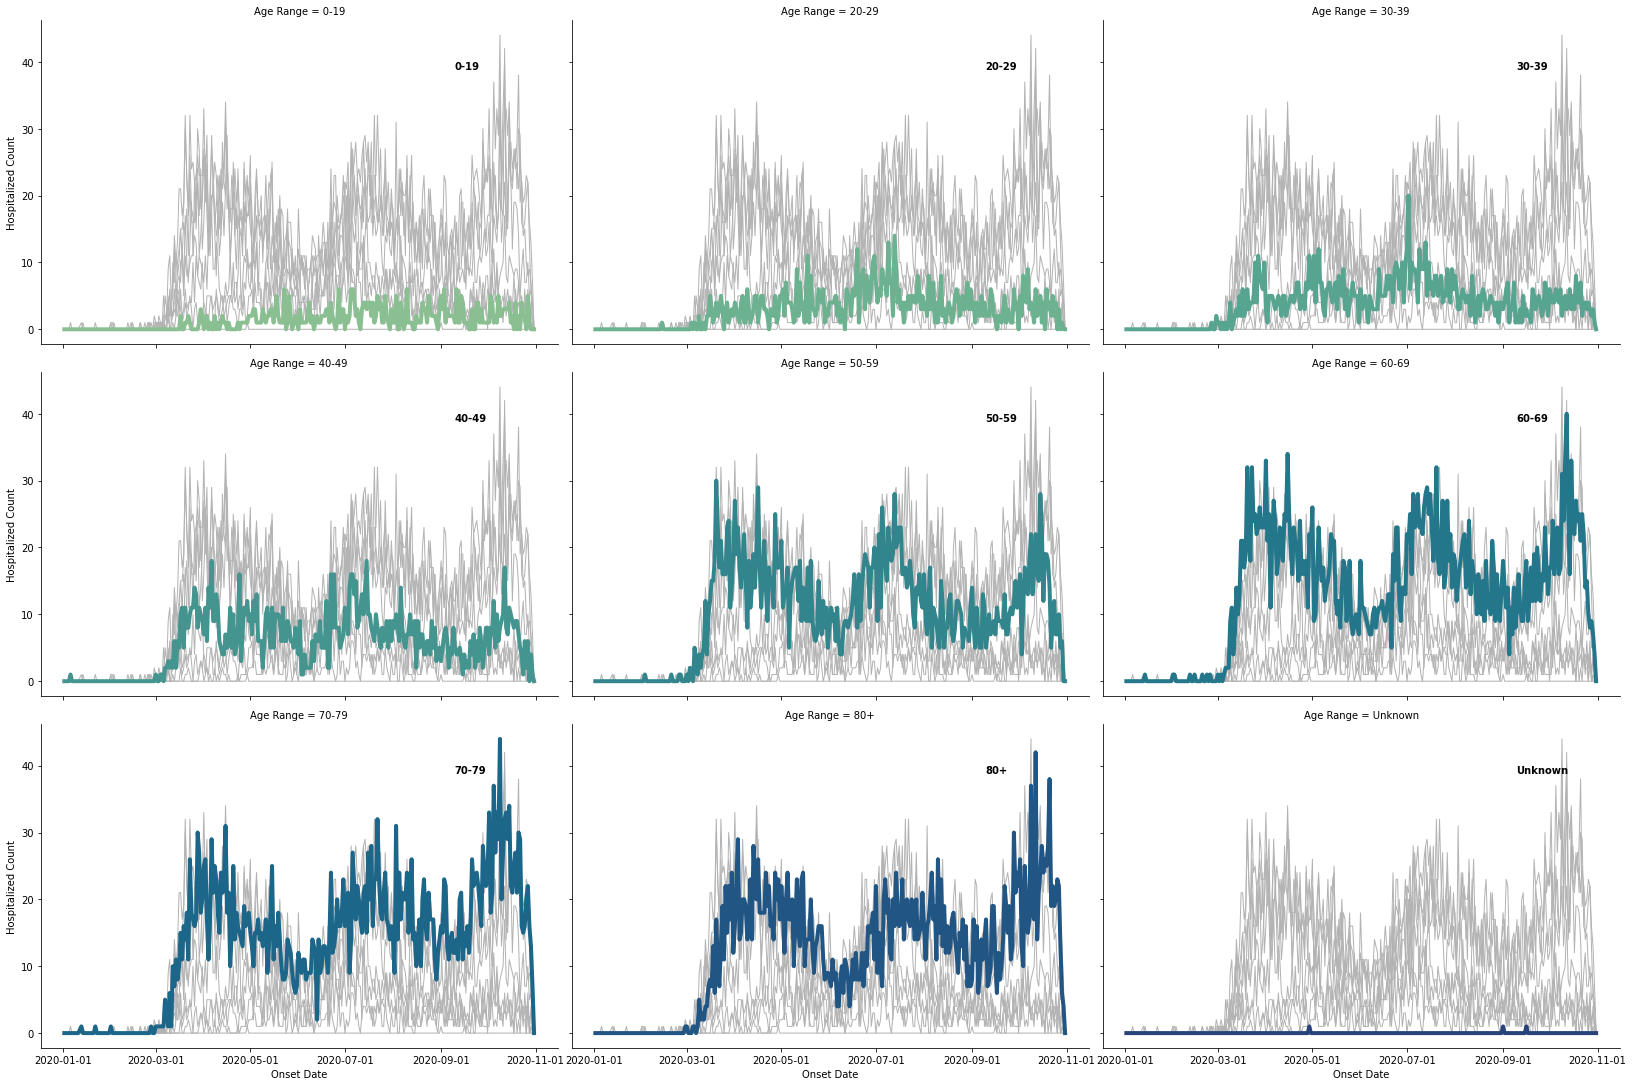

In [19]:
replotbyAge(groupedOnsetSortedSummary,"Onset Date","Hospitalized Count","Age Range")

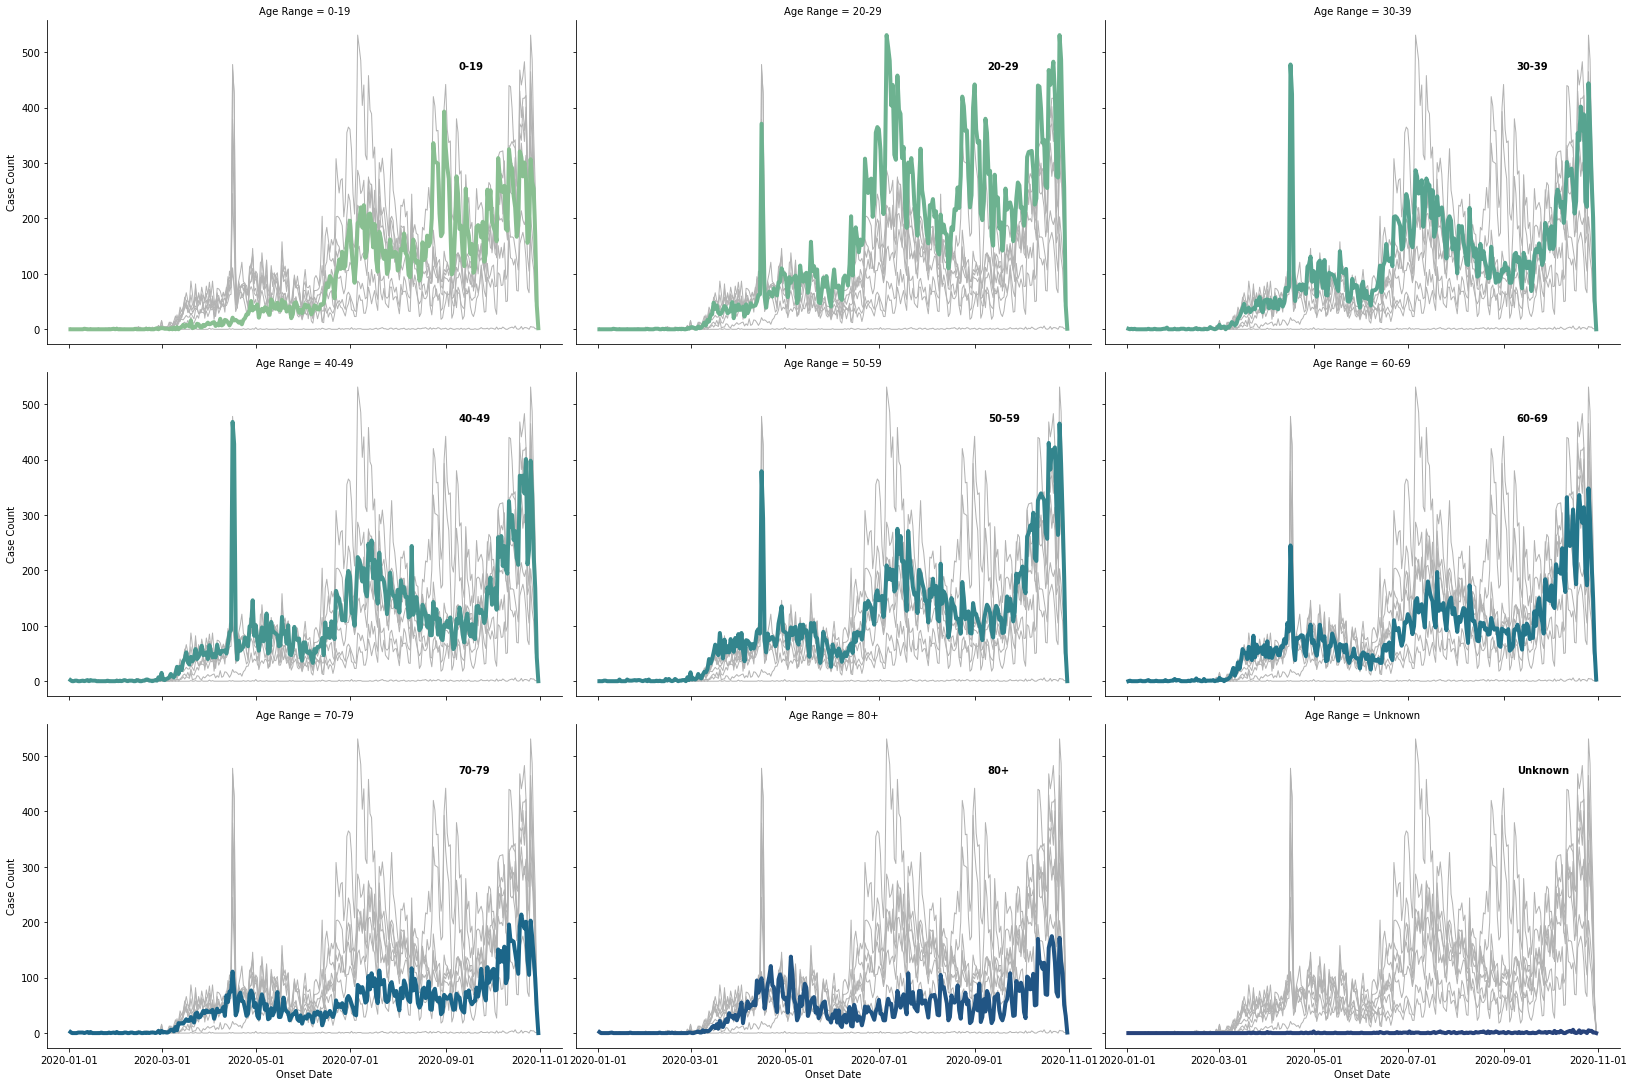

In [20]:
replotbyAge(groupedOnsetSortedSummary,"Onset Date","Case Count","Age Range")

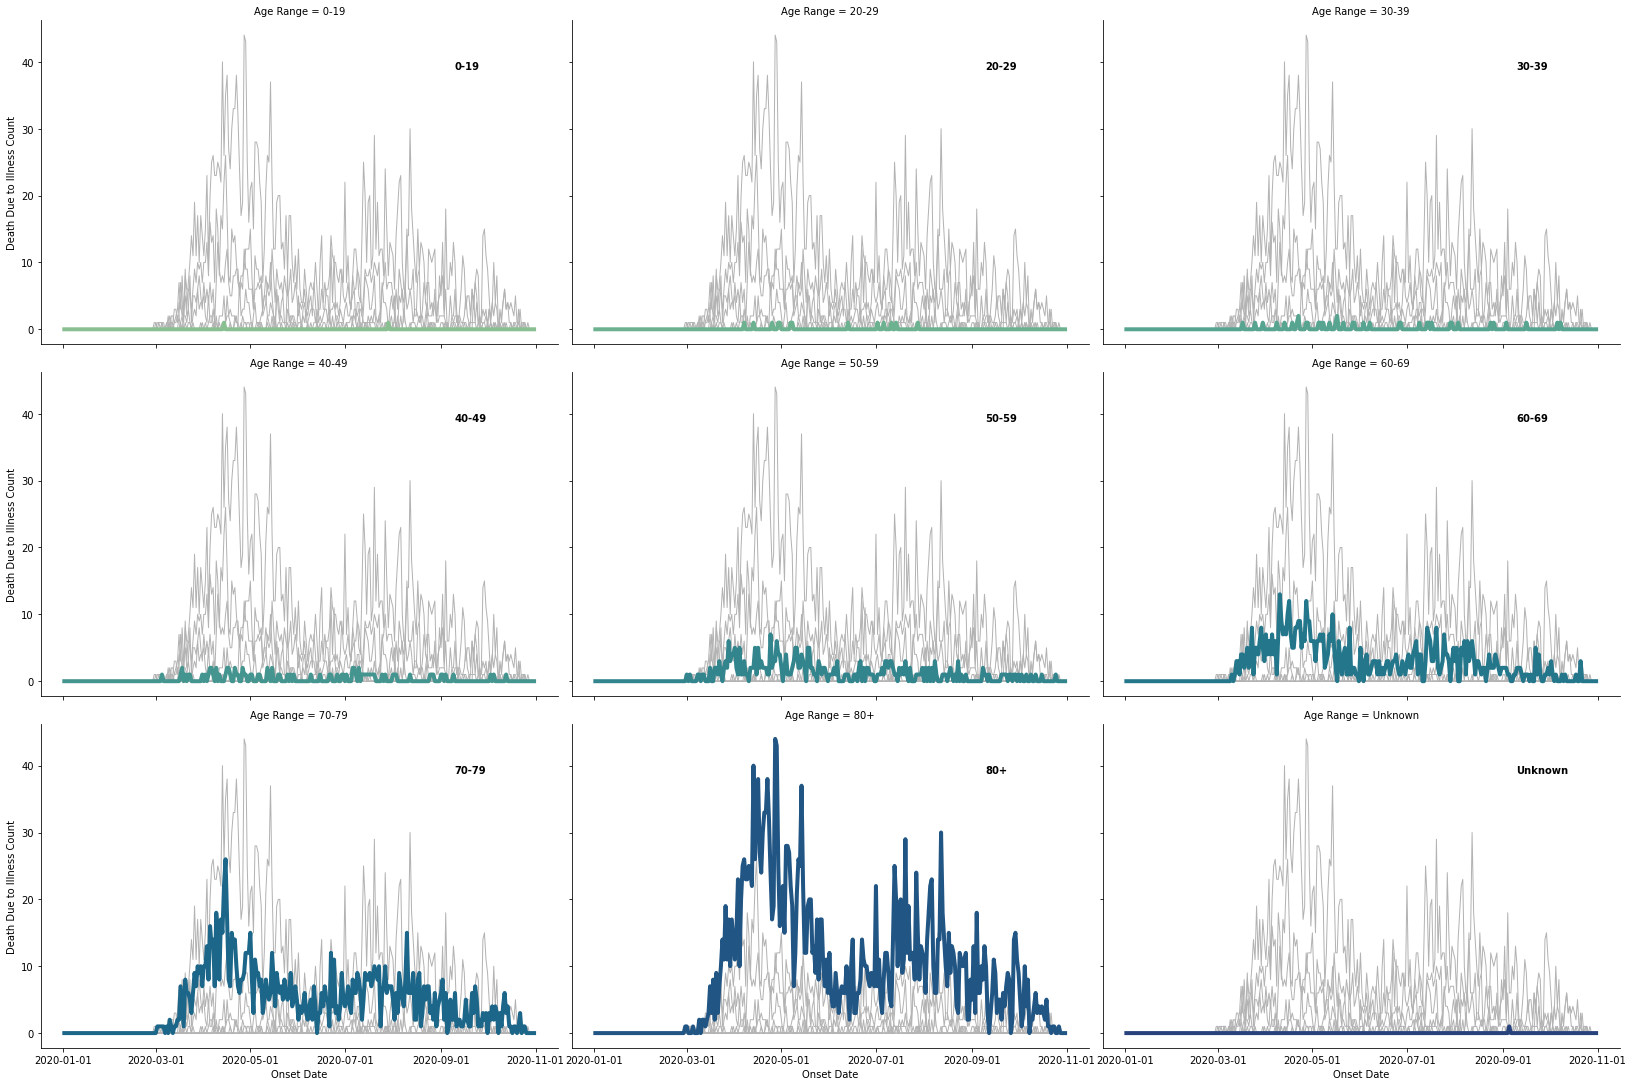

In [21]:
replotbyAge(groupedOnsetSortedSummary,"Onset Date","Death Due to Illness Count","Age Range")